In [1]:
import molsysmt as msm
from molsysmt import pyunitwizard as puw
import omembrane as omem
import openmm as mm
from openmm import app as app
from openmm import unit as u
import numpy as np
import math
from matplotlib import pyplot as plt
from tqdm import tqdm
from sys import stdout

from openmm import LocalEnergyMinimizer

In [2]:
molsys = msm.convert('memb_popc_100_stage_3_2.h5msm')

In [3]:
P_atoms = msm.select(molsys, selection='atom_type=="P" and molecule_type=="lipid"')
N_atoms = msm.select(molsys, selection='atom_type=="N" and molecule_type=="lipid"')
O_atoms = msm.select(molsys, selection='atom_type=="O" and molecule_type=="lipid"')
C_atoms = msm.select(molsys, selection='atom_type=="C" and molecule_type=="lipid"')
OW_atoms = msm.select(molsys, selection='atom_type=="O" and molecule_type=="water"')

PO_heads_atoms = msm.select(molsys, selection='atom_name in ["P","O11","O12","O13","O14"] and molecule_type=="lipid"')

In [4]:
topology = msm.convert(molsys, 'openmm.topology')
positions = msm.get(molsys, coordinates=True)

In [5]:
forcefield = mm.app.ForceField("amber14-all.xml", "amber14/tip3p.xml")

In [6]:
system = forcefield.createSystem(topology, nonbondedMethod=app.PME, nonbondedCutoff=1.2*u.nanometer, constraints=app.HBonds)

In [7]:
friction = 1 / u.picosecond
timestep = 2 * u.femtoseconds
temperature = 300.0 * u.kelvin
integrator = mm.LangevinIntegrator(temperature, friction, timestep)

In [8]:
pressure = 1.0 * u.bar
surface_tension = 0.0 * u.bar * u.nanometer
xymode = 0
zmode = 0
barostat_frequency = 25

barostat = mm.MonteCarloMembraneBarostat(pressure, surface_tension, temperature, xymode, zmode, barostat_frequency)

# Añadir el barostato al sistema
system.addForce(barostat)

5

In [9]:
platform = mm.Platform.getPlatformByName("CUDA")

In [10]:
simulation = app.Simulation(topology, system, integrator, platform)
simulation.context.setPositions(msm.pyunitwizard.convert(positions[0], to_form='openmm.unit'))

In [11]:
simulation.context.setVelocitiesToTemperature(temperature)

In [12]:
state_init = simulation.context.getState(getPositions=True, enforcePeriodicBox=True)

In [13]:
reporter = app.StateDataReporter(stdout, 10000, step=True, potentialEnergy=True, temperature=True, volume=True)
simulation.reporters = [reporter]

In [14]:
simulation.step(100000) #

#"Step","Potential Energy (kJ/mole)","Temperature (K)","Box Volume (nm^3)"
10000,-669976.1135894312,297.5850827158948,610.0046670713181
20000,-670311.8680052217,299.4748315389532,607.8404390148735
30000,-668587.4395010048,299.1613608874109,612.7488572353865
40000,-669214.8697649837,300.7851106498364,612.2631151780827
50000,-670573.2295412575,299.7148351789953,611.2398817296945
60000,-668654.0576368766,298.3929142612007,612.1546846840789
70000,-670662.0444742711,300.32534315667306,611.9847632739176
80000,-670863.5814074758,300.0797084100654,610.1533196821665
90000,-669137.2618988948,297.9015680311272,611.5706692752373
100000,-671703.7350167907,299.7755450413267,609.2924855155289


In [21]:
simulation.step(100000) #

110000,-668886.0478460728,300.61717096088034,612.9787238801703
120000,-670141.9417075492,299.3928815853755,614.0830497643814
130000,-672822.894356064,302.16082584176456,611.191566264776
140000,-669740.6300458149,299.8787628740265,611.4661369669554
150000,-670502.5697986246,301.8176653502066,610.9711978229982
160000,-670656.4392863605,300.2085276833904,610.9410499983746
170000,-670394.2162578395,299.2225807815024,612.4219829786059
180000,-670180.338140117,299.14668511324686,608.9139668391424
190000,-670078.9224228808,299.49456730900016,611.0744193793898
200000,-671645.9731288883,300.3229425899194,611.3551767600617


In [34]:
simulation.step(100000) #

210000,-670646.5533279916,299.794897124737,609.9566362638749
220000,-670227.1294070813,298.92840303992756,611.0706668826635
230000,-671418.6842324222,301.4977227785038,611.175605179262
240000,-671349.7695312495,298.94588853381407,610.8891351430584
250000,-668795.5654174974,298.19653155619005,611.9731723547008
260000,-670500.9822009569,298.9131807253991,611.8640138082231
270000,-669607.4111986221,300.2731061332216,612.2286726039544
280000,-671307.1240160665,299.16945178943695,610.0701446334579
290000,-670541.5856250403,299.15098740946644,613.2432841049263
300000,-670399.6450882186,299.0612154324687,612.7498933193183


In [45]:
simulation.step(100000) #

310000,-669347.2337026028,299.50107134791216,613.5355734284008
320000,-668669.461143563,302.2333394745928,612.0842550222106
330000,-670781.8844502615,301.5244996830833,612.5470233182075
340000,-670261.0047794669,301.76029843806884,611.4200533380492
350000,-670081.646444662,302.3329091876036,611.7757429380248
360000,-669810.8886593278,299.9381897548344,611.5582733104684
370000,-670406.6572924876,300.8906461351409,609.6239242039267
380000,-670980.8389333314,301.3292987097561,611.2120289318524
390000,-669982.9259111653,301.1651160251955,610.6091706206004
400000,-669391.7737733065,300.63812023500935,609.3722096129021


In [56]:
simulation.step(100000) #

410000,-670131.9162037796,298.620858117968,611.2494523055273
420000,-671675.8943275963,298.18949835701295,611.0234108739726
430000,-669985.3569435477,301.01509435015987,611.1716812922159
440000,-670650.2254236466,299.4947608500754,609.4716355880663
450000,-670369.0263131545,299.828424955122,610.9021154052944
460000,-669089.289753695,301.2870302870259,613.9648567198261
470000,-670076.9323534663,298.1164742146621,612.6897314765263
480000,-670130.520122454,300.298435976619,609.5686083027955
490000,-670966.525318353,301.87070462148023,610.6242332947462
500000,-669582.047201483,299.95610235315024,611.1154660107337


In [64]:
simulation.step(500000) #

510000,-669846.9681223393,300.8646026151775,610.3851739304675
520000,-670855.642841083,299.8356814188301,611.8137661006815
530000,-670845.5128827179,301.0701679851637,610.8716188273219
540000,-671652.5374407624,302.0657836148679,612.5053239357655
550000,-671460.7940668184,298.7859396670561,611.0220319304633
560000,-670842.1463498017,299.1622657028106,610.6527925216795
570000,-671201.5080361287,300.41062954056736,609.3034108353562
580000,-671224.2232301016,299.3927899357075,610.8555687610258
590000,-670958.8124799421,301.13819679700396,611.7286150199401
600000,-670290.2989534368,301.8497887081804,611.4723588672492
610000,-670695.2775189341,297.5105824977376,611.5782057113871
620000,-671263.5710067633,301.5592565197383,610.0372059867567
630000,-671066.4150352553,298.9775277533909,612.0584446001512
640000,-673270.2639705865,300.3480031372096,609.1807554121217
650000,-671282.9367674924,301.38235781530307,611.2059734712042
660000,-670774.639281434,300.915497545686,610.7875336072713
670000,-

In [65]:
state_end = simulation.context.getState(getPositions=True, enforcePeriodicBox=True)

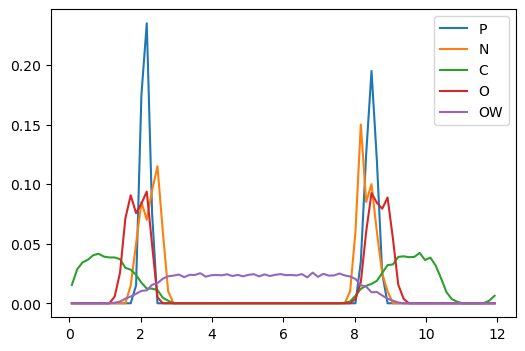

In [66]:
bins_edges_P_init, density_P_init = omem.analysis.get_lineal_density(state_init, selection = P_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_N_init, density_N_init = omem.analysis.get_lineal_density(state_init, selection = N_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_C_init, density_C_init = omem.analysis.get_lineal_density(state_init, selection = C_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_O_init, density_O_init = omem.analysis.get_lineal_density(state_init, selection = O_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_OW_init, density_OW_init = omem.analysis.get_lineal_density(state_init, selection=OW_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)


plt.rcParams["figure.figsize"] = (6,4)
plt.plot((bins_edges_P_init[1:]+bins_edges_P_init[:-1])/2, density_P_init, label='P')
plt.plot((bins_edges_N_init[1:]+bins_edges_N_init[:-1])/2, density_N_init, label='N')
plt.plot((bins_edges_C_init[1:]+bins_edges_C_init[:-1])/2, density_C_init, label='C')
plt.plot((bins_edges_O_init[1:]+bins_edges_O_init[:-1])/2, density_O_init, label='O')
plt.plot((bins_edges_OW_init[1:]+bins_edges_OW_init[:-1])/2, density_OW_init, label='OW')
plt.legend()

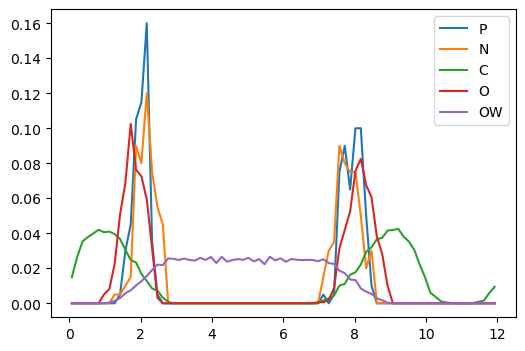

In [67]:
bins_edges_P_end, density_P_end = omem.analysis.get_lineal_density(state_end, selection = P_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_N_end, density_N_end = omem.analysis.get_lineal_density(state_end, selection = N_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_C_end, density_C_end = omem.analysis.get_lineal_density(state_end, selection = C_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_O_end, density_O_end = omem.analysis.get_lineal_density(state_end, selection = O_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)
bins_edges_OW_end, density_OW_end = omem.analysis.get_lineal_density(state_end, selection=OW_atoms, axis = [0,0,1],
                                                       bins = 80, range="[0.0, 12.0] nm", normalized=True)

plt.rcParams["figure.figsize"] = (6,4)
plt.plot((bins_edges_P_end[1:]+bins_edges_P_end[:-1])/2, density_P_end, label='P')
plt.plot((bins_edges_N_end[1:]+bins_edges_N_end[:-1])/2, density_N_end, label='N')
plt.plot((bins_edges_C_end[1:]+bins_edges_C_end[:-1])/2, density_C_end, label='C')
plt.plot((bins_edges_O_end[1:]+bins_edges_O_end[:-1])/2, density_O_end, label='O')
plt.plot((bins_edges_OW_end[1:]+bins_edges_OW_end[:-1])/2, density_OW_end, label='OW')
plt.legend()
plt.show()

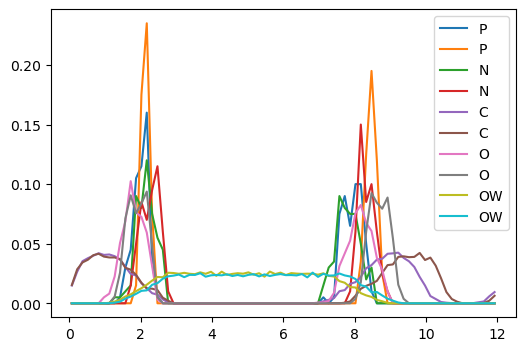

In [68]:
plt.rcParams["figure.figsize"] = (6,4)
plt.plot((bins_edges_P_end[1:]+bins_edges_P_end[:-1])/2, density_P_end, label='P')
plt.plot((bins_edges_P_init[1:]+bins_edges_P_init[:-1])/2, density_P_init, label='P')

plt.plot((bins_edges_N_end[1:]+bins_edges_N_end[:-1])/2, density_N_end, label='N')
plt.plot((bins_edges_N_init[1:]+bins_edges_N_init[:-1])/2, density_N_init, label='N')

plt.plot((bins_edges_C_end[1:]+bins_edges_C_end[:-1])/2, density_C_end, label='C')
plt.plot((bins_edges_C_init[1:]+bins_edges_C_init[:-1])/2, density_C_init, label='C')

plt.plot((bins_edges_O_end[1:]+bins_edges_O_end[:-1])/2, density_O_end, label='O')
plt.plot((bins_edges_O_init[1:]+bins_edges_O_init[:-1])/2, density_O_init, label='O')

plt.plot((bins_edges_OW_end[1:]+bins_edges_OW_end[:-1])/2, density_OW_end, label='OW')
plt.plot((bins_edges_OW_init[1:]+bins_edges_OW_init[:-1])/2, density_OW_init, label='OW')

plt.legend()
plt.show()

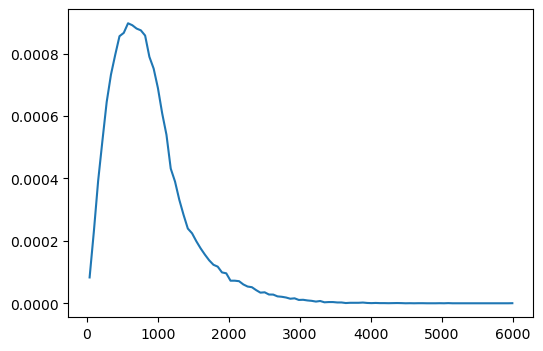

In [69]:
forces = msm.molecular_mechanics.get_forces(simulation.context, norm=True)
h, bins = np.histogram(puw.get_value(forces), bins=100, density=True)
plt.plot(0.5*(bins[1:]+bins[:-1]), h)
plt.show()

In [70]:
#memb_antes = msm.extract(molsys, selection='molecule_type=="lipid"', to_form='molsysmt.MolSys')
#memb_despues = msm.extract([molsys, simulation.context], selection='molecule_type=="lipid"', to_form='molsysmt.MolSys')

In [71]:
#msm.view(memb_despues)

In [72]:
box = msm.get(state_end, box=True)
box[0][0,0]**2/100

Quantity(value=0.6211022746439059, unit=nanometer**2)

In [73]:
coordinates, box = msm.get(state_end, coordinates=True, box=True)
msm.set(molsys, coordinates=coordinates, box=box)

In [74]:
msm.view(molsys, standard=False)

NGLWidget()

In [75]:
msm.convert(molsys, 'memb_popc_100_stage_3_3.h5msm')

'memb_popc_100_stage_3_3.h5msm'